In [6]:
import os
import re
import librosa
import numpy as np
import librosa.display
import matplotlib.pyplot as plt
from tqdm import tqdm

In [7]:
data_dir = "/home/lb/cryp7f0x/workspace/data_processing/data/raw_data/"

speech_data = data_dir + "Audio_Speech_Actors_01-24/"
song_data = data_dir + "Audio_Song_Actors_01-24/"

output = "/home/lb/cryp7f0x/workspace/data_processing/data/processed_data/"
speech_output = output + "speech/"
song_output = output + "song/"

In [8]:
dicts={'01' : 'neutral', '02' : 'calm', '03' : 'happy', '04' : 'sad', '05' : 'angry', '06' : 'fearful', '07' : 'disgust', '08' : 'surprised'}

In [9]:
def process_data(data_path, output_path):
    data_folders = os.listdir(data_path)
    
    for folder in tqdm(data_folders):
        path_in = os.path.join(data_path, folder)
        files_sub = os.listdir(path_in)
        
        for file in files_sub:
            # get numbers from filename
            numbers = re.findall('\d+',  file)
            # index of emotion int
            emotion = dicts[numbers[2]]

            path_save = os.path.join(output_path, emotion)

            if not os.path.exists(path_save):
                os.makedirs(path_save)

            img_file = file.split('.')[0]+".jpeg"
            path_save = os.path.join(path_save, img_file)
            path_load = os.path.join(path_in,file)

            y, sr = librosa.load(path_load)
            yt, _ = librosa.effects.trim(y)
            y = yt
            mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=100)
            mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
            librosa.display.specshow(mel_spect, y_axis='mel', fmax=20000, x_axis='time');
            plt.savefig(path_save)

    print(data_path + " has been processed into " + output_path + " !")

100%|███████████████████████████████████████| 24/24 [7:31:59<00:00, 1129.99s/it]


/home/lb/cryp7f0x/workspace/data_processing/data/raw_data/Audio_Song_Actors_01-24/ has been processed into /home/lb/cryp7f0x/workspace/data_processing/data/processed_data/song/ !


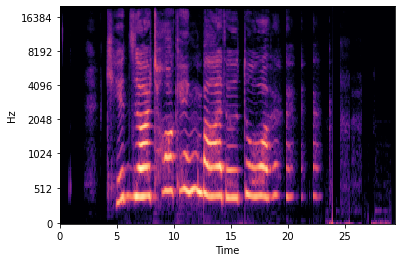

In [10]:
# processing speech data
process_data(speech_data, speech_output)

# processing song data
process_data(song_data, song_output)